<a href="https://colab.research.google.com/github/Vedika1102/GRIP_Task2/blob/main/GRIP_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vedika Shinde 

GRIP Task 2

Prediction using unsupervised ML



In [34]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [35]:
#Reading data
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
#to get shape of data
df.shape

(150, 6)

In [37]:
#To get summary of data

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [38]:
#checking for any null values present in data
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Id                  AxesSubplot(0.125,0.657941;0.352273x0.222059)
SepalLengthCm    AxesSubplot(0.547727,0.657941;0.352273x0.222059)
SepalWidthCm        AxesSubplot(0.125,0.391471;0.352273x0.222059)
PetalLengthCm    AxesSubplot(0.547727,0.391471;0.352273x0.222059)
PetalWidthCm           AxesSubplot(0.125,0.125;0.352273x0.222059)
dtype: object

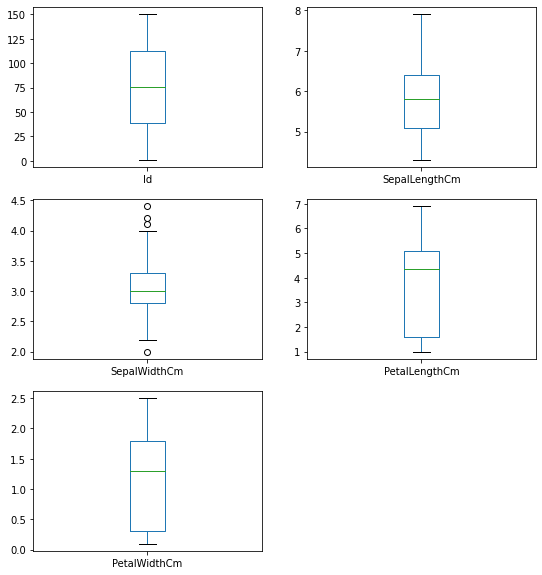

In [39]:
#Checking for outliners

df.plot(kind='box',subplots=True, layout=(3,2),figsize=(9,10))

In [40]:
#outliners will be removed after PCA 

In [41]:
#Getting the species from the data

df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

AS WE HAVE 3 CATEGORIES IN SPECIES COLUMN, SO WE SHOULD USE LABEL_ENCODER TO ENCODE THE SPECIES COLUMN

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species'].unique()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


#To predict optimium number of clusters

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  #Default value as 0.95
df_decomposed = pca.fit_transform(df)
print(df.shape)
print(df_decomposed.shape)

(150, 6)
(150, 1)


Got only one one feature to work on therefor in our case we will skip PCA

In [44]:
#Removing outliners through IQR Approch

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

IQR = q3 - q1

lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

df1 = df[~((df < lower_limit) | (df > upper_limit)).any(axis=1)]
df1.shape    

(146, 6)

In [45]:
df1.drop(['Id'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
df1.shape

(146, 5)

#KMEANS CLUSTERING

In [47]:
from sklearn.cluster import KMeans
wcv = []

for i in range(1,7):
    km = KMeans(n_clusters = i)
    km.fit(df1)
    km.inertia_
    wcv.append(km.inertia_)
print(wcv)

[751.9708904109589, 170.63840833333333, 82.12217828918803, 61.78330595358711, 46.3560694193599, 39.098244673735145]


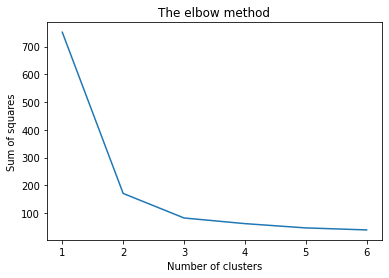

In [48]:
#THE ELBOW METHOD

plt.plot(range(1,7),wcv)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares')
plt.show()

3 OPTIMAL NUMBER OD CLUSTERS

In [49]:
km = KMeans(n_clusters=3)
km.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
y_pred = km.fit_predict(df1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [51]:
pd.Series(y_pred).value_counts()

2    50
1    49
0    47
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


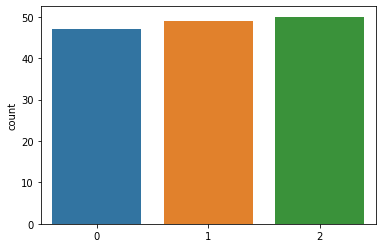

In [52]:
sns.countplot(y_pred)
plt.show()

In [53]:
df1['clusters'] = y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
